In [2]:
#Depenemcies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [12]:
#reading
df =  pd.read_csv('./smoking.csv')

In [13]:
#shape
df.shape #(55692, 27)

(55692, 27)

In [15]:
#info
df.info()

<AxesSubplot:ylabel='gender'>

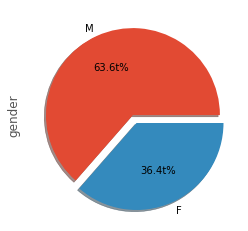

In [22]:
# percentage of male and females
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1ft%%',shadow=True)

<AxesSubplot:ylabel='smoking'>

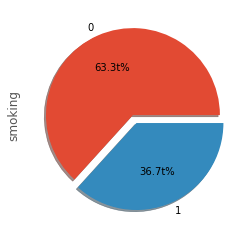

In [26]:
# percentage of people smoking
df['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1ft%%',shadow=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x2aaeb6a0fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2aaeb6b1730>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aaeb6a0c40>],
 'medians': [<matplotlib.lines.Line2D at 0x2aaeb6b1e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aaeb6bc220>],
 'means': []}

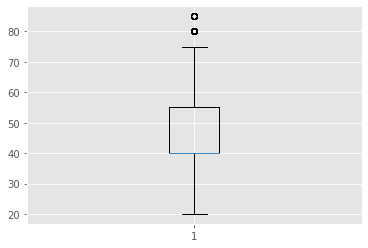

In [28]:
#box plot to show describe age
plt.boxplot(df['age'])  #mean: 44 median:20 mode:85

{'whiskers': [<matplotlib.lines.Line2D at 0x2aaeb88a430>,
 'caps': [<matplotlib.lines.Line2D at 0x2aaeb88ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aaeb88a0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2aaeb8992b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aaeb899640>],
 'means': []}

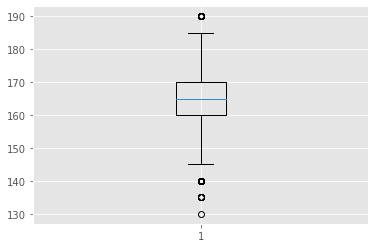

In [31]:
#boxplot to show heights
plt.boxplot(df['height(cm)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2aaeb8f1a60>,
 'caps': [<matplotlib.lines.Line2D at 0x2aaeb9021c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aaeb8f16d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2aaeb9028e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aaeb902c70>],
 'means': []}

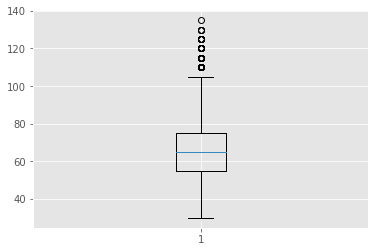

In [32]:
# boxplot for weight
plt.boxplot(df['weight(kg)'])

In [34]:
#make group show of average age smoking
ag =  df.groupby("smoking")['age'].mean()
ag

smoking
0    45.677981
1    41.607431
Name: age, dtype: float64

<AxesSubplot:ylabel='age'>

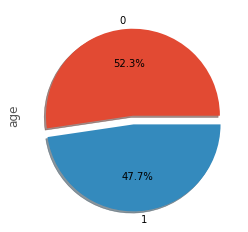

In [37]:
#plot of average age smoking
ag.plot(kind='pie', explode=[0,0.1],autopct="%1.1f%%",shadow=True)

In [42]:
#group to show the average age, height, weigth and smoking by gender
summary =  df.groupby(['gender','smoking'])["age","height(cm)","weight(kg)"].mean().round(0)
summary

C:\Users\JUNIOR\AppData\Local\Temp/ipykernel_11504/259982419.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary =  df.groupby(['gender','smoking'])["age","height(cm)","weight(kg)"].mean().round(0)


age  height(cm)  weight(kg)
gender smoking                              
F      0        49.0       156.0        56.0
       1        46.0       157.0        56.0
M      0        42.0       170.0        71.0
       1        41.0       170.0        72.0

<AxesSubplot:xlabel='gender,smoking'>

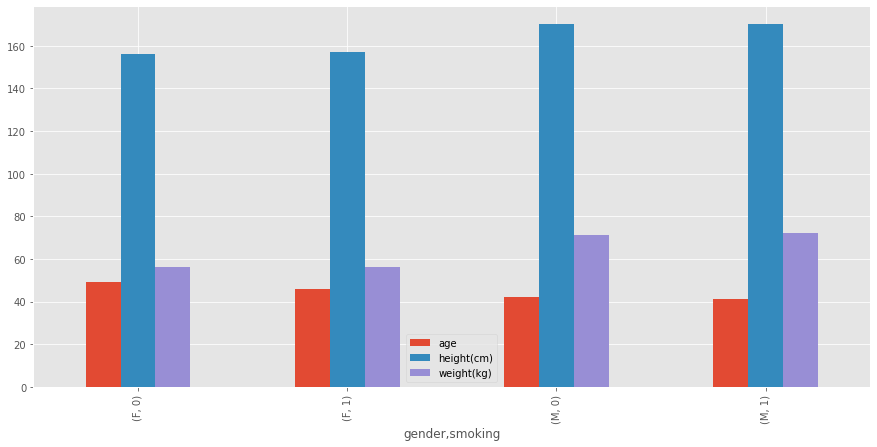

In [43]:
#graph the group
summary.plot(kind="bar",figsize=(15,7))

# Building Machine learning Model

In [62]:
X_train =  pd.read_csv('x_train.csv')
X_test =  pd.read_csv('x_test.csv')
y_train =  pd.read_csv('y_train.csv')
y_test =  pd.read_csv('y_test.csv')

In [63]:
l =  [X_train,X_test,y_train,y_test]
for i in l:
    i.info()
    
    
del X_train['oral']
del X_test['oral']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44553 non-null  int64  
 1   gender               44553 non-null  object 
 2   age                  44553 non-null  int64  
 3   height(cm)           44553 non-null  int64  
 4   weight(kg)           44553 non-null  int64  
 5   waist(cm)            44553 non-null  float64
 6   eyesight(left)       44553 non-null  float64
 7   eyesight(right)      44553 non-null  float64
 8   hearing(left)        44553 non-null  float64
 9   hearing(right)       44553 non-null  float64
 10  systolic             44553 non-null  float64
 11  relaxation           44553 non-null  float64
 12  fasting blood sugar  44553 non-null  float64
 13  Cholesterol          44553 non-null  float64
 14  triglyceride         44553 non-null  float64
 15  HDL                  44553 non-null 

In [64]:
l3 = [X_train, X_test]
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
ONE =  OneHotEncoder(handle_unknown="ignore")

def oneHot(df,a):
    cat_encoder = OneHotEncoder()
    ec_encoder =  cat_encoder.fit_transform(df[[a]])
    return ec_encoder.toarray()

X_train["gender"] =  oneHot(X_train,"gender")
X_test["gender"] = oneHot(X_test,"gender")

In [65]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories = [['N','Y']])
X_train["tartar"] = ordinal_encoder.fit_transform(X_train[["tartar"]])
X_test["tartar"] = ordinal_encoder.fit_transform(X_test[["tartar"]])

In [66]:
#libraries for buiding the model

from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

<AxesSubplot:>

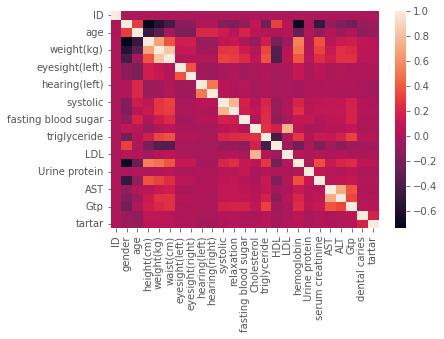

In [67]:
sns.heatmap(X_train.corr())

In [68]:
y_train =  y_train['smoking']
y_test =  y_test['smoking']

# Decision Tree Classifier

In [76]:
#Training
model =  DecisionTreeClassifier()
model.fit(X_train,y_train)

#predictions
y_pred =  model.predict(X_test)
#evaluate
print("Accuracy",accuracy_score(y_pred,y_test))

Accuracy 0.9350031421132956
